<a href="https://colab.research.google.com/github/tanongsakintean/google_colab/blob/main/firstspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Method 1: Manual Installation — the Not-so-easy Way
Firstly, let’s talk about how to install Spark on Google Colab manually.

# Step 1.1: Download Java because Spark requires Java Virtual Machine (JVM).

ref: https://towardsdatascience.com/pyspark-on-google-colab-101-d31830b238be


https://medium.com/grabngoinfo/install-pyspark-3-on-google-colab-the-easy-way-577ec4a2bcd8

https://blog.datath.com/cheatsheet-pyspark/



In [3]:
#PyPI ย่อมาจาก Python Package Index เป็นแหล่งรวมชุดคำสั่งของภาษา Python โดยทำงานร่วมกับคำสั่ง pip สำหรับติดตั้งชุดคำสั่งใน Python
pip install pypi-install

SyntaxError: ignored

In [4]:
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Step 1.2: Download the latest version of the Apache Spark following the steps below:

Go to https://spark.apache.org/downloads.html
Choose a Spark release version and a package type. The default is the latest version. When this tutorial is published, the latest Spark release is 3.2.1, and the package type is Pre-built for Apache Haddoop 3.3 and later.
Click the link for downloading Spark (the blue link on spark-3.2.1-bin-hadoop3.2.tgz), and you will be directed to a new web page.
Copy the first link on the web page (https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz), which is below the sentence “We suggest the following site for your download:”.
Download Spark from the copied link.
Unzip the file

In [5]:
# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz


In [6]:
# Unzip the file
!tar xf spark-3.3.0-bin-hadoop3.tgz

# Step 1.3: Set up the environment for Spark.

In [7]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.3.0-bin-hadoop3'

# Step 1.4: Install and import the library for locating Spark.

In [8]:
# Install library for finding Spark
!pip install -q findspark
# Import the libary
import findspark
# Initiate findspark
findspark.init()
# Check the location for Spark
findspark.find()

'/content/spark-3.3.0-bin-hadoop3'

# Step 1.5: Start a Spark session, and check the session information.

# SparkSession
With Spark 2.0 a new class SparkSession (pyspark.sql import SparkSession) has been introduced. SparkSession is a combined class for all different contexts we used to have prior to 2.0 release (SQLContext and HiveContext e.t.c)

In [9]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

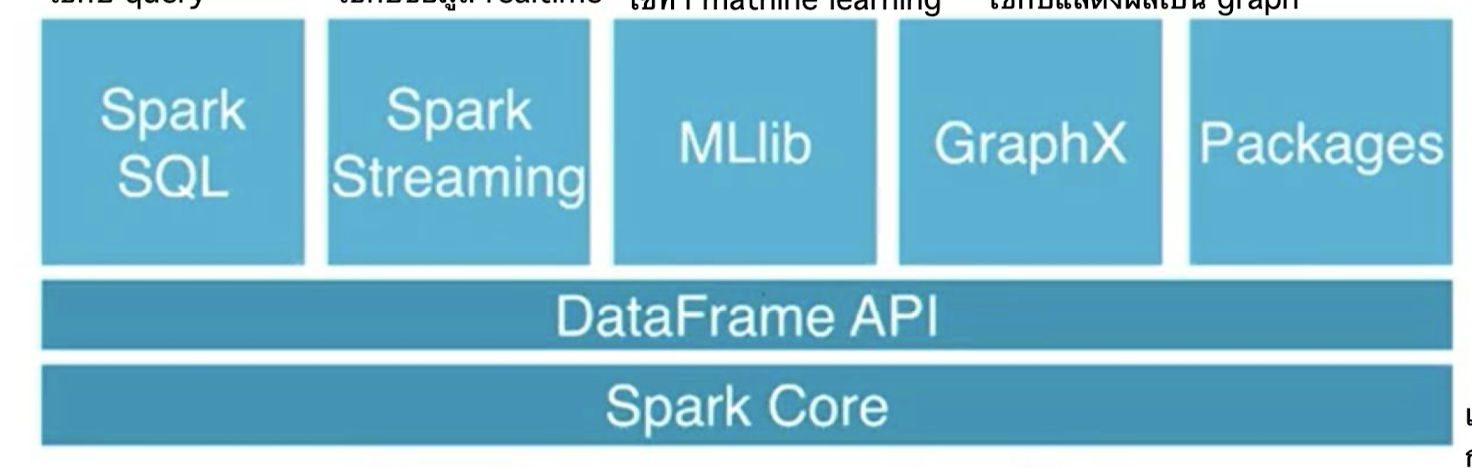

In [10]:
from pyspark.sql.types import * #PySpark SQL Types class is a base class of all data types in PuSpark which defined in a package pyspark.
from pyspark.sql.functions import * #functions List of built-in functions available for DataFram
from pyspark.sql import Window #operate on a group of rows (like frame, partition) and return a single value for every input row.
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100) #You can also set the value to None to show all columns.  to reset optiion -> pd.reset_option('display.max_columns')


# 1.7  Work with Spark


**Spark SQL** is a component on top of Spark Core that facilitates processing of structured and semi-structured data and the integration of several data formats as source (Hive, Parquet, JSON).

It allows to transform RDDs using SQL (Structured Query Language).

To start Spark SQL within your notebook, you need to create a SQL context.

## SparkContext
SparkContext is the entry point to any spark functionality. When we run any Spark application, a driver program starts, which has the main function and your SparkContext gets initiated here. The driver program then runs the operations inside the executors on worker nodes.


In [11]:
from pyspark import SparkContext
from pyspark.sql import SQLContext

sqlc = SQLContext(spark)
sc=spark.sparkContext

/content/spark-3.3.0-bin-hadoop3/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


The common data structure in Spark is DataFrame. You can construct a dataframe in various way. for example;

**1. Parallelize the Python list.**

Spark จะจัดเก็บข้อมูลในรูปแบบ RDD  ซึ่งตัว Rdd นี้เป็น data format พื้นฐานของ spark ไม่ว่าเราจะประมวลผลใดๆใน spark ข้อมูลแต่ละชิ้นต้องถูกจัดเก็บใน rdd object เสมอ ในขั้นตอนนี้ถ้าเราจะดูว่า data_rdd ถูกแบ่งข้อมูลออกเป็นกี่ partition ให้ใช้คำสั่ง data_rdd.getNumPartitions()

In [17]:
myList = [['Apple',20],['Orange',12],['Banana',8]]
myDF1 =sc.parallelize(myList)

In [18]:
myDF1.getNumPartitions() #กระจาย data ไป 1 node

1

In [14]:
myDF1.collect() # in action

[['Apple', 20], ['Orange', 12], ['Banana', 8]]

In [22]:
pd.DataFrame({'Name':['John','Miclale','Steve','Tony'],'Age':[25,27,48,53]})

,Name,Age
0,John,25
1,Miclale,27
2,Steve,48
3,Tony,53


**2. Transform the Pandas dataframe**


In [19]:
#sqlc = SQLContext(spark)
pandasDF = pd.DataFrame({'Name':['John','Miclale','Steve','Tony'],'Age':[25,27,48,53]})

In [20]:
myDF2 = sqlc.createDataFrame(pandasDF)

/content/spark-3.3.0-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/content/spark-3.3.0-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [21]:
myDF2.collect()

[Row(Name='John', Age=25),
 Row(Name='Miclale', Age=27),
 Row(Name='Steve', Age=48),
 Row(Name='Tony', Age=53)]

# show(),collect(),take() => group action
df.show() : It will show only the content of the dataframe.

df.collect() : It will show the content and metadata of the dataframe.

df.take() : shows content and structure/metadata for a limited number of rows for a very large dataset.

In [23]:
myDF2.collect() #Collect() – Retrieve data from Spark RDD/DataFrame !!show metadata + content

[Row(Name='John', Age=25),
 Row(Name='Miclale', Age=27),
 Row(Name='Steve', Age=48),
 Row(Name='Tony', Age=53)]

In [24]:
myDF2.show(2) #action !!show content only

+-------+---+
|   Name|Age|
+-------+---+
|   John| 25|
|Miclale| 27|
+-------+---+
only showing top 2 rows



In [25]:
myDF2.take(2) #action !!show metadata + content  !!!take can limit but collect not limit

[Row(Name='John', Age=25), Row(Name='Miclale', Age=27)]

In [26]:
myDF2.toPandas() #action

,Name,Age
0,John,25
1,Miclale,27
2,Steve,48
3,Tony,53


**3. Read from the file : CSV**

We will use SparkSession to access Spark's functionality. The SparkSession is the combination of SparkContext, SQLContext, HiveContext and StreamingContext.

In [27]:
sparkF = SparkSession.builder.getOrCreate()

In [34]:
myDF3 = sparkF.read.csv('/content/churn.csv',header=True,inferSchema=True)
#inferschema = true คือให้ sprark อ่านข้อมูลมาและเดาว่า column นี้มี datatype เป็นอะไร
#concern : don't forget upload file to sampledata at yourDrive and copy path

In [37]:
myDF3.show(4)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [35]:
myDF3.limit(3).toPandas() #ให้ออกแค่ 3 รายการ

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [38]:
myDF3.printSchema()
#ทดลองให้แสดงชนิดของข้อมูลในแต่ละคอลัมภ์ ตามที่ spark convert มาให้ สังเกต TotalCharges มีชนิดข้อมูลที่ผิดไป


root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



#You can see the Spark misinterpret the data type of some column even the inferSchema enabled. We can specify the type of each column by defining the schema of dataset.

In [39]:
cols = myDF3.columns # เอาชื่อ header เหมือนเดิม

In [40]:
types = [StringType(),
         StringType(),
         IntegerType(),
         StringType(),
         StringType(),
         IntegerType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         StringType(),
         DoubleType(),
         DoubleType(),
         StringType()]
#สร้่าง type มาเองตาม column

In [41]:
schemaList = []
for i in range(len(cols)):
  schemaList.append(StructField(cols[i],types[i])) #สร้างเป็น strucfield
Schema = StructType(schemaList) #แล้วเอาไปใส่ใน StructType

In [42]:
myDF3 = sparkF.read.csv('/content/churn.csv',header=True,schema = Schema)
#schema => เอา schema ที่เราสร้าง ใส่ไปแทน

In [43]:
myDF3.limit(3).toPandas()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [44]:
myDF3.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



Now the type of each column is correctly interpret.
We can drop customerID column because it gives us no information.

In [45]:
myDF3 = myDF3.drop('customerID') #drop column

In [46]:
myDF3.limit(3).toPandas()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


from now on, we will work around this dataframe as dataset.

In [47]:
dataset = myDF3

#1.8 Selection and Filterling
Selection and filtering allows you to pick desired range of data across the dataset.

Selection is column-based process. Whilist filtering is record-baased process.

Keep in mind the spark will not apply any type of transformation to initial dataframe unless you use assignment operation.

In [48]:
dataset.select(['PaymentMethod','MonthlyCharges','TotalCharges','Churn']).limit(10).toPandas()

,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Electronic check,29.85,29.85,No
1,Mailed check,56.95,1889.50,No
2,Mailed check,53.85,108.15,Yes
3,Bank transfer (automatic),42.30,1840.75,No
4,Electronic check,70.70,151.65,Yes
5,Electronic check,99.65,820.50,Yes
6,Credit card (automatic),89.10,1949.40,No
7,Mailed check,29.75,301.90,No
8,Electronic check,104.80,3046.05,Yes
9,Bank transfer (automatic),56.15,3487.95,No


In [51]:
dataset.filter(dataset.MonthlyCharges>50).limit(5).toPandas()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
1,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
2,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
3,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
4,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No


In [55]:
dataset.select(['PaymentMethod','MonthlyCharges','TotalCharges','Churn'])\
       .filter(dataset.TotalCharges>100).filter(dataset.PaymentMethod =='Credit card (automatic)')\
       .limit(10)\
       .toPandas()

,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Credit card (automatic),89.10,1949.40,No
1,Credit card (automatic),18.95,326.80,No
2,Credit card (automatic),100.35,5681.10,No
3,Credit card (automatic),113.25,7895.15,No
4,Credit card (automatic),55.20,528.35,Yes
5,Credit card (automatic),59.90,3505.10,No
6,Credit card (automatic),59.60,2970.30,No
7,Credit card (automatic),90.25,6369.45,No
8,Credit card (automatic),96.35,6766.95,No
9,Credit card (automatic),95.50,181.65,No


***when***
เป็นคำสั่งหนึ่งที่ไว้ใช้เลือกในกรณีที่มี condition เข้ามาด้วย  

นอกจากนี้เรายังสามารถใช้ when ซ้อน when ในกรณีที่มีหลาย conditions ตามตัวอย่างที่สอง

In [61]:
from pyspark.sql import functions as F
dataset.select(dataset.PaymentMethod, F.when(dataset.TotalCharges	 > 5000, 'high')\
.otherwise('low')).show(20,False)
#false = will show you the full column content

+-------------------------+------------------------------------------------------+
|PaymentMethod            |CASE WHEN (TotalCharges > 5000) THEN high ELSE low END|
+-------------------------+------------------------------------------------------+
|Electronic check         |low                                                   |
|Mailed check             |low                                                   |
|Mailed check             |low                                                   |
|Bank transfer (automatic)|low                                                   |
|Electronic check         |low                                                   |
|Electronic check         |low                                                   |
|Credit card (automatic)  |low                                                   |
|Mailed check             |low                                                   |
|Electronic check         |low                                                   |
|Ban

In [62]:
dataset.select(dataset.PaymentMethod, F.when(dataset.TotalCharges	 > 5000, 'high').otherwise('low')).toPandas()

,PaymentMethod,CASE WHEN (TotalCharges > 5000) THEN high ELSE low END
0,Electronic check,low
1,Mailed check,low
2,Mailed check,low
3,Bank transfer (automatic),low
4,Electronic check,low
...,...,...
7038,Mailed check,low
7039,Credit card (automatic),high
7040,Electronic check,low
7041,Mailed check,low


In [63]:
# ตัวอย่าง 2
dataset.select(dataset.PaymentMethod,dataset.TotalCharges, F.when(dataset.TotalCharges <1000, 'low').when(dataset.TotalCharges < 3000,'medium').otherwise('high')).show(20,False)

+-------------------------+------------+---------------------------------------------------------------------------------------------+
|PaymentMethod            |TotalCharges|CASE WHEN (TotalCharges < 1000) THEN low WHEN (TotalCharges < 3000) THEN medium ELSE high END|
+-------------------------+------------+---------------------------------------------------------------------------------------------+
|Electronic check         |29.85       |low                                                                                          |
|Mailed check             |1889.5      |medium                                                                                       |
|Mailed check             |108.15      |low                                                                                          |
|Bank transfer (automatic)|1840.75     |medium                                                                                       |
|Electronic check         |151.65      |low            

If you are familiar with SQLs. Saprk also provides sQL interface to process the dataframe using quries.
You need to create a view of desired dataframe before query process.

In [64]:
dataset.createOrReplaceTempView('ChurnView') #เอา data จาก myDF3 ไปสร้างเป็น view

In [72]:
sparkF.sql('SELECT PaymentMethod,MonthlyCharges,TotalCharges,Churn FROM ChurnView WHERE PaymentMethod = \'Credit card (automatic)\' AND TotalCharges > 1000' ).limit(10).toPandas()


,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Credit card (automatic),89.10,1949.40,No
1,Credit card (automatic),100.35,5681.10,No
2,Credit card (automatic),113.25,7895.15,No
3,Credit card (automatic),59.90,3505.10,No
4,Credit card (automatic),59.60,2970.30,No
5,Credit card (automatic),90.25,6369.45,No
6,Credit card (automatic),96.35,6766.95,No
7,Credit card (automatic),74.80,3548.30,No
8,Credit card (automatic),69.20,4872.35,No
9,Credit card (automatic),79.85,4861.45,No


# 1.9 Descriptive Fuction
Descriptive function provieds short summary in single dimension of dataset.

the most usefule descritive function is **describe** which summarize numerical features of the data

In [66]:
dataset.describe(['MonthlyCharges','TotalCharges','PaymentMethod']).toPandas()

,summary,MonthlyCharges,TotalCharges,PaymentMethod
0,count,7043,7032,7043
1,mean,64.76169246059922,2283.3004408418697,None
2,stddev,30.090047097678482,2266.771361883145,None
3,min,18.25,18.8,Bank transfer (automatic)
4,max,118.75,8684.8,Mailed check


**select().distint()** is useful to inspect the variation of categorical features of data. Forexample : How many paymentmethod we have.
      มันคือ group ประเภท

In [75]:
print('Total '+str(dataset.select('PaymentMethod').distinct().count())+' types')
dataset.select('PaymentMethod').distinct().toPandas()

Total 4 types


,PaymentMethod
0,Credit card (automatic)
1,Mailed check
2,Bank transfer (automatic)
3,Electronic check


Using **groupby().count()** will show how many recoreds we have in each distinct category. For example : How may transactions involved with particular paymentmethod.

In [76]:
dataset.groupby('PaymentMethod').count().toPandas()

,PaymentMethod,count
0,Credit card (automatic),1522
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Electronic check,2365


In [ ]:
dataset.groupby('PaymentMethod').count().sort('count',ascending = False).toPandas()

,PaymentMethod,count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


# Step 2.0 Loading JSON data into PySpark
Spark has a variety of modules to read data of different formats. It also automatically determines the data type for each column, but it has to go over it once.

For this article, I have created a sample JSON dataset in Github. You can download the file directly into Colab using the ‘wget’ command like this:

In [77]:
!wget --continue https://raw.githubusercontent.com/GarvitArya/pyspark-demo/main/sample_books.json -O /tmp/sample_books.json

--2023-10-05 03:33:34--  https://raw.githubusercontent.com/GarvitArya/pyspark-demo/main/sample_books.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1565 (1.5K) [text/plain]
Saving to: ‘/tmp/sample_books.json’

/tmp/sample_books.j 100%[===================>]   1.53K  --.-KB/s    in 0s      

2023-10-05 03:33:34 (23.5 MB/s) - ‘/tmp/sample_books.json’ saved [1565/1565]



In [78]:
df = spark.read.json("/tmp/sample_books.json")

# Step 2.1 Exploratory Data Analysis with PySpark
Let’s check out its Schema:
Before doing any slice & dice of the dataset, we should first be aware what all columns it has and its data types.

In [79]:
df.printSchema()

root
 |-- author: string (nullable = true)
 |-- edition: string (nullable = true)
 |-- price: double (nullable = true)
 |-- title: string (nullable = true)
 |-- year_written: long (nullable = true)



In [80]:
df.show(13,False)

+--------------------+-----------------+-----+-----------------------------+------------+
|author              |edition          |price|title                        |year_written|
+--------------------+-----------------+-----+-----------------------------+------------+
|Austen, Jane        |Penguin          |18.2 |Northanger Abbey             |1814        |
|Tolstoy, Leo        |Penguin          |12.7 |War and Peace                |1865        |
|Tolstoy, Leo        |Penguin          |13.5 |Anna Karenina                |1875        |
|Woolf, Virginia     |Harcourt Brace   |25.0 |Mrs. Dalloway                |1925        |
|Cunnningham, Michael|Harcourt Brace   |12.35|The Hours                    |1999        |
|Twain, Mark         |Penguin          |5.76 |Huckleberry Finn             |1865        |
|Dickens, Charles    |Random House     |5.75 |Bleak House                  |1870        |
|Twain, Mark         |Random House     |7.75 |Tom Sawyer                   |1862        |
|Woolf, Vi

In [81]:
df.count()

13

In [82]:
df.select("title", "price", "year_written").show(5)

+----------------+-----+------------+
|           title|price|year_written|
+----------------+-----+------------+
|Northanger Abbey| 18.2|        1814|
|   War and Peace| 12.7|        1865|
|   Anna Karenina| 13.5|        1875|
|   Mrs. Dalloway| 25.0|        1925|
|       The Hours|12.35|        1999|
+----------------+-----+------------+
only showing top 5 rows



In [83]:
df_filtered = df.filter("year_written > 1950 AND price > 10 AND title IS NOT NULL")
df_filtered.select("title", "price", "year_written").show(5, False) #False =  results will not be truncated

+-----------------------------+-----+------------+
|title                        |price|year_written|
+-----------------------------+-----+------------+
|The Hours                    |12.35|1999        |
|Harry Potter                 |19.95|2000        |
|One Hundred Years of Solitude|14.0 |1967        |
+-----------------------------+-----+------------+



In [84]:
df_filtered.select("title", "year_written").filter("title LIKE '%Harry Potter%'").distinct().show(5, False)

+------------+------------+
|title       |year_written|
+------------+------------+
|Harry Potter|2000        |
+------------+------------+



# Aggregate
Aggregate: กระบวนการในคำนวนข้อมูลในรูปแบบต่างๆ สมมุติว่าเรามีข้อมูลอยู่ 3 ตัว a#1, b#1, a#1 หลังจากเข้ากระบวนการ sum aggregate แล้วลผลลัพธ์จะได้ a#2, b#1 โดยผลลัพที่ได้จาก aggregate สามารถนำเข้าสู่ Transform อีกรอบเพื่อคำนวนในมิติอื่นต่อไป

In [85]:
from pyspark.sql.functions import max
# Find the costliest book
maxValue = df_filtered.agg(max("price")).collect()[0][0]
print("maxValue: ",maxValue)
df_filtered.select("title","price").filter(df.price == maxValue).show(1,False)

maxValue:  19.95
+------------+-----+
|title       |price|
+------------+-----+
|Harry Potter|19.95|
+------------+-----+



# Exercise:
ให้นักศึกษา download data จากเว็บที่กำหนดให้

In [91]:
!wget https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv

--2023-10-05 03:38:16--  https://jacobceles.github.io/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobceles.github.io (jacobceles.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobceles.github.io (jacobceles.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv [following]
--2023-10-05 03:38:16--  https://jacobcelestine.com/knowledge_repo/colab_and_pyspark/cars.csv
Resolving jacobcelestine.com (jacobcelestine.com)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to jacobcelestine.com (jacobcelestine.com)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22608 (22K) [text/csv]
Saving to: ‘cars.csv.1’

cars.csv.1          100%[===================>]  22.08K  --.-KB/s    in 0.002s  

2023-10-05 03:38:16 (12.2 MB/s) - ‘cars.csv.1’ saved [22608/22608]



In [194]:
df = spark.read.csv('cars.csv', header=True, sep=";")
df.show(15)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
|    Ford Galaxie 500|15.0|        8|       429.0|     198.0| 4341.|        10.0|   70|    US|
|    Chevrolet Impala|14.0|        8|       454.0|     220.0| 4354.|         9.0|   70|    US|
|   Plymouth Fury iii|14.0|        8|       440.0|

In [ ]:
df.write.format("csv").save("/content/carspark.csv")

ให้นักศึกษาหาผลลัพธ์เพื่อให้ได้คำตอบต่อไปนี้
1. แสดงข้อมูล Origin โดยนับจำนวนของรถจากแต่ละแหล่ง ตัวอย่างเช่น

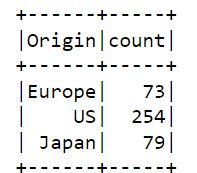



In [97]:
df.groupby('Origin').count().show()

+------+-----+
|Origin|count|
+------+-----+
|Europe|   73|
|    US|  254|
| Japan|   79|
+------+-----+



2. แสดงข้อมูลรถที่ผลิตจาก Europeเท่านั้นโดยมีรูปแบบการแสดงผลดังนี้


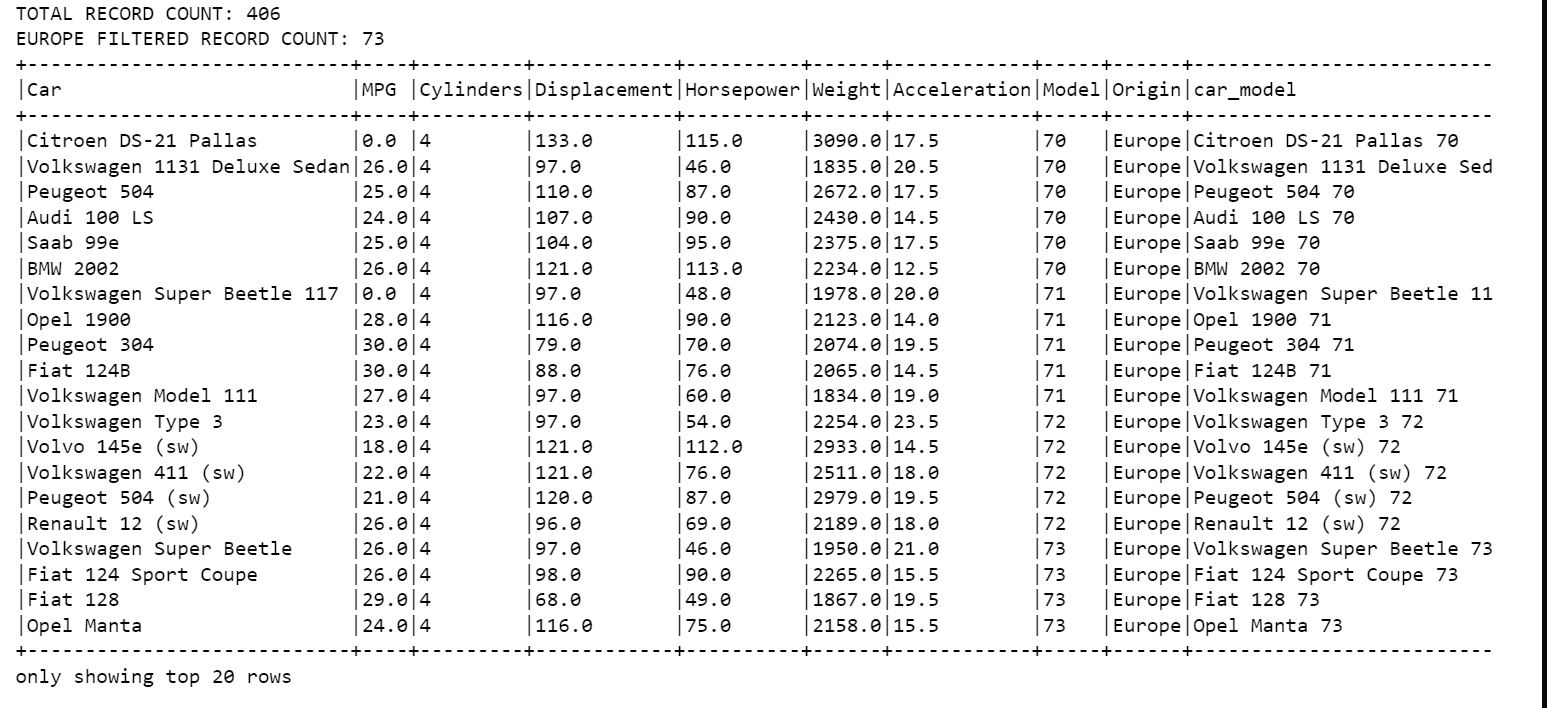

In [166]:
print('TOTAL RECORD COUNT:  '+str(df.count()))
print('EUROPE FILTERED RECORD COUNT : '+str(sparkF.sql('SELECT * FROM carView WHERE Origin = \'Europe\'' ).count()))

df.createOrReplaceTempView('carView') #เอา data จาก myDF3 ไปสร้างเป็น vie
sparkF.sql('SELECT * , CONCAT(Car," ",Model) AS car_model FROM carView WHERE Origin = \'Europe\'' ).show()


TOTAL RECORD COUNT:  406
EUROPE FILTERED RECORD COUNT : 73
+--------------------+----+---------+------------+----------+------+------------+-----+------+--------------------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|           car_model|
+--------------------+----+---------+------------+----------+------+------------+-----+------+--------------------+
|Citroen DS-21 Pallas|   0|        4|       133.0|     115.0| 3090.|        17.5|   70|Europe|Citroen DS-21 Pal...|
|Volkswagen 1131 D...|26.0|        4|       97.00|     46.00| 1835.|        20.5|   70|Europe|Volkswagen 1131 D...|
|         Peugeot 504|25.0|        4|       110.0|     87.00| 2672.|        17.5|   70|Europe|      Peugeot 504 70|
|         Audi 100 LS|24.0|        4|       107.0|     90.00| 2430.|        14.5|   70|Europe|      Audi 100 LS 70|
|            Saab 99e|25.0|        4|       104.0|     95.00| 2375.|        17.5|   70|Europe|         Saab 99e 70|
|            

In [188]:
cols = df.columns # เอาชื่อ header เหมือนเดิม

In [189]:
types = [StringType(),
         DoubleType(),
         IntegerType(),
         DoubleType(),
         DoubleType(),
         DoubleType(),
         DoubleType(),
         IntegerType(),
         StringType()]
#สร้่าง type มาเองตาม column

In [190]:
schemaList = []
for i in range(len(cols)):
  schemaList.append(StructField(cols[i],types[i])) #สร้างเป็น strucfield
Schema = StructType(schemaList) #แล้วเอาไปใส่ใน StructType

In [195]:
df = sparkF.read.csv('cars.csv',header=True,schema = Schema,sep=";")
#schema => เอา schema ที่เราสร้าง ใส่ไปแทน


3. แสดงข้อมูลของ Origin  = US โดยถ้า แรงม้าน้อยก่า 150 ให้แสดง Low ไม่เช่นนั้นแล้วแสดง High ตัวอย่างเช่น

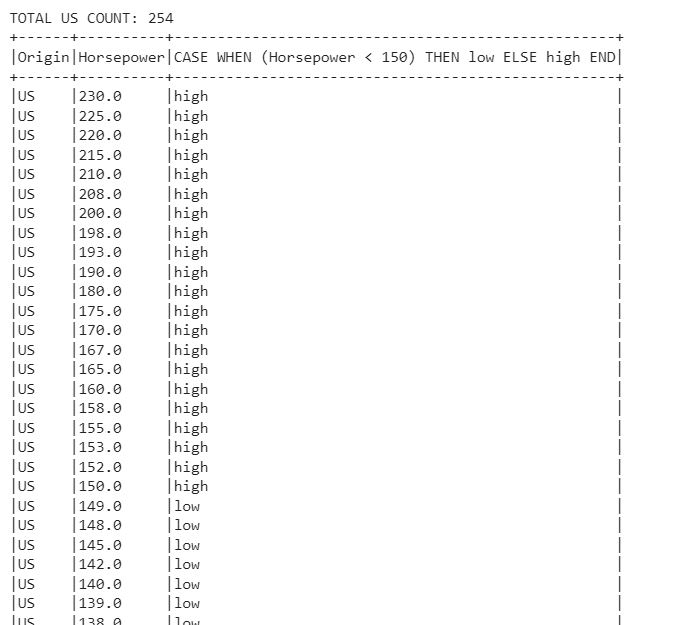

In [197]:
print('TOTAL US COUNT : '+str(sparkF.sql('SELECT Origin,Horsepower ,(CASE WHEN Horsepower < 150 THEN "low" ELSE "high" END) AS bb FROM carView WHERE Origin = \'US\'' ).count()))
# sparkF.sql('SELECT Origin,Horsepower ,(CASE WHEN Horsepower < 150 THEN "low" ELSE "high" END) AS bb FROM carView WHERE Origin = \'US\' ORDER BY Horsepower DESC ').show(254)

df.select(df.Origin,df.Horsepower,F.when(df.Horsepower < 150,'low').otherwise('high')).filter(df.Origin == 'US').orderBy(col("Horsepower").desc()).show(254)

TOTAL US COUNT : 254
+------+----------+---------------------------------------------------+
|Origin|Horsepower|CASE WHEN (Horsepower < 150) THEN low ELSE high END|
+------+----------+---------------------------------------------------+
|    US|     230.0|                                               high|
|    US|     225.0|                                               high|
|    US|     225.0|                                               high|
|    US|     225.0|                                               high|
|    US|     220.0|                                               high|
|    US|     215.0|                                               high|
|    US|     215.0|                                               high|
|    US|     215.0|                                               high|
|    US|     210.0|                                               high|
|    US|     208.0|                                               high|
|    US|     200.0|                        

In [150]:
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



In [155]:
cols = df.columns # เอาชื่อ header เหมือนเดิม

In [162]:
types = [StringType(),
         DoubleType(),
         IntegerType(),
         DoubleType(),
         DoubleType(),
         DoubleType(),
         DoubleType(),
         IntegerType(),
         StringType()]
#สร้่าง type มาเองตาม column

In [163]:
schemaList = []
for i in range(len(cols)):
  schemaList.append(StructField(cols[i],types[i])) #สร้างเป็น strucfield
Schema = StructType(schemaList) #แล้วเอาไปใส่ใน StructType

In [198]:
myDF3 = sparkF.read.csv('cars.csv',header=True,schema = Schema,sep=";")
#schema => เอา schema ที่เราสร้าง ใส่ไปแทน


In [199]:
myDF3.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: double (nullable = true)
 |-- Cylinders: integer (nullable = true)
 |-- Displacement: double (nullable = true)
 |-- Horsepower: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Acceleration: double (nullable = true)
 |-- Model: integer (nullable = true)
 |-- Origin: string (nullable = true)



In [200]:
myDF3.show()

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0|3504.0|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0|3693.0|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0|3436.0|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0|3433.0|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0|3449.0|        10.5|   70|    US|
|    Ford Galaxie 500|15.0|        8|       429.0|     198.0|4341.0|        10.0|   70|    US|
|    Chevrolet Impala|14.0|        8|       454.0|     220.0|4354.0|         9.0|   70|    US|
|   Plymouth Fury iii|14.0|        8|       440.0|